<a href="https://colab.research.google.com/github/SIDD082/NHANES_Inferential_2023/blob/main/nhanes_inferentail.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()


Saving VID_L.xpt to VID_L.xpt
Saving KIQ_U_L.xpt to KIQ_U_L.xpt
Saving WHQ_L.xpt to WHQ_L.xpt
Saving PAQ_L.xpt to PAQ_L.xpt
Saving DPQ_L.xpt to DPQ_L.xpt
Saving HEPB_S_L.xpt to HEPB_S_L.xpt
Saving BPXO_L.xpt to BPXO_L.xpt
Saving DEMO_L.xpt to DEMO_L.xpt


In [2]:
!pip install pyreadstat

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 666.4/666.4 kB 34.3 MB/s eta 0:00:00


In [25]:
import pyreadstat
df, meta = pyreadstat.read_sav("C:/Users/siddi/Downloads/DEMO_L.xpt")

PyreadstatError: File C:/Users/siddi/Downloads/DEMO_L.xpt does not exist!

In [4]:
import numpy as np
from scipy.stats import chi2_contingency, f_oneway
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os

In [8]:
!pip install pyreadstat
!pip install pandas
!pip install requests
!pip install seaborn
!pip install scipy
!pip install matplotlib


In [22]:
# trying to Run R to convert xpt to csv files

install.packages("haven")

NameError: name 'install' is not defined

In [6]:
# Load the rpy2 extension
%load_ext rpy2.ipython

Now you can use the `%%R` magic command to run R code in a cell.

In [7]:
%%R
install.packages("haven")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)
trying URL 'https://cran.rstudio.com/src/contrib/haven_2.5.5.tar.gz'
Content type 'application/x-gzip' length 316909 bytes (309 KB)
downloaded 309 KB


The downloaded source packages are in
	‘/tmp/Rtmp3zX3Rr/downloaded_packages’


In [9]:
import os

In [14]:
display(dataframes['DEMO_L'].info())

NameError: name 'dataframes' is not defined

In [23]:
%%R -i uploaded

# List all files in the current directory
files <- list.files("/content/", pattern = "\\.xpt$", full.names = TRUE)

# Loop through each .xpt file and convert it to .csv
for (file in files) {
  # Read the .xpt file using haven
  data <- haven::read_xpt(file)

  # Construct the output filename (change extension to .csv)
  output_file <- sub("\\.xpt$", ".csv", file)

  # Write the data to a .csv file
  write.csv(data, output_file, row.names = FALSE)

  cat(paste("Converted", file, "to", output_file, "\n"))
}

NotImplementedError: Conversion 'py2rpy' not defined for objects of type '<class 'dict'>'

In [24]:
import os

# List all files in the /content/ directory
files_in_content = os.listdir("C:/Users/siddi/Downloads/DEMO_L.xpt")

# Filter for files ending with .csv
csv_files = [f for f in files_in_content if f.endswith('.csv')]

if csv_files:
    print("CSV files found in C:/Users/siddi/Downloads/DEMO_L.xpt:")
    for csv_file in csv_files:
        print(csv_file)
else:
    print("No CSV files found in /content/.")

FileNotFoundError: [Errno 2] No such file or directory: 'C:/Users/siddi/Downloads/DEMO_L.xpt'

In [ ]:
display(dataframes)

In [ ]:
display(dataframes['DEMO_L'].head())

In [ ]:
import pandas as pd
import os

# List all CSV files in the /content/ directory
csv_files = [f for f in os.listdir('/content/') if f.endswith('.csv')]

# Create a dictionary to store the DataFrames
dataframes = {}

# Loop through each CSV file and load it into a DataFrame
for csv_file in csv_files:
    file_path = os.path.join('/content/', csv_file)
    df_name = os.path.splitext(csv_file)[0] # Get filename without extension
    dataframes[df_name] = pd.read_csv(file_path)
    print(f"Loaded {csv_file} into DataFrame '{df_name}'")

# You can now access the DataFrames using the dictionary, e.g., dataframes['DEMO_L'].head()

In [28]:
%%R
library(haven) # Load the haven library

folder <- "/content/"
xpt_files <- list.files(folder, pattern = "\\.xpt$", full.names = TRUE)

# Loop through and convert each to .csv
for (xpt_file in xpt_files) {
  # Read .xpt file
  data <- read_xpt(xpt_file)

  # Create .csv filename
  csv_file <- sub("\\.xpt$", ".csv", xpt_file)

  # Write to CSV
  write.csv(data, csv_file, row.names = FALSE)

  cat("✅ Converted:", xpt_file, "→", csv_file, "\n")
}

✅ Converted: /content//BPXO_L.xpt → /content//BPXO_L.csv 
✅ Converted: /content//DEMO_L.xpt → /content//DEMO_L.csv 
✅ Converted: /content//DPQ_L.xpt → /content//DPQ_L.csv 
✅ Converted: /content//HEPB_S_L.xpt → /content//HEPB_S_L.csv 
✅ Converted: /content//KIQ_U_L.xpt → /content//KIQ_U_L.csv 
✅ Converted: /content//PAQ_L.xpt → /content//PAQ_L.csv 
✅ Converted: /content//VID_L.xpt → /content//VID_L.csv 
✅ Converted: /content//WHQ_L.xpt → /content//WHQ_L.csv 


In [31]:
# changing back to python

demo = pd.read_csv("/content/DEMO_L.csv")
bp = pd.read_csv("/content/BPXO_L.csv")
vitd = pd.read_csv("/content/VID_L.csv")
hepb = pd.read_csv("/content/HEPB_S_L.csv")
kidney = pd.read_csv("/content/KIQ_U_L.csv")
minbehavior = pd.read_csv("/content/PAQ_L.csv")
weight = pd.read_csv("/content/WHQ_L.csv")
mental = pd.read_csv("/content/DPQ_L.csv")

In [35]:
# Question 1

 #clean datasets
# Drop rows with missing marital status or education level
demo = demo.dropna(subset=['DMDMARTZ', 'DMDEDUC2'])

# Convert columns to string type
demo['DMDMARTZ'] = demo['DMDMARTZ'].astype(str)
demo['DMDEDUC2'] = demo['DMDEDUC2'].astype(str)

# Standardize text (strip whitespace, lowercase)
demo['DMDMARTZ'] = demo['DMDMARTZ'].str.strip().str.lower()
demo['DMDEDUC2'] = demo['DMDEDUC2'].str.strip().str.lower()

# Optional: Replace inconsistent labels
demo['DMDMARTZ'] = demo['DMDMARTZ'].replace({
    'single': 'unmarried',
    'never married': 'unmarried',
    'married': 'married',
    'divorced': 'divorced',
    'widowed': 'widowed'
})

demo['DMDEDUC2'] = demo['DMDEDUC2'].replace({
    'high school': 'high school',
    'hs': 'high school',
    'bachelor': 'bachelor',
    'ba': 'bachelor',
    'master': 'master',
    'phd': 'phd'
})

# Task
Analyze the association between marital status and education level using the `demo` DataFrame.

## Create a contingency table

### Subtask:
Create a cross-tabulation (contingency table) of the `DMDMARTZ` and `DMDEDUC2` columns from the `demo` DataFrame.


**Reasoning**:
Create a contingency table of marital status and education level using the cleaned demo DataFrame and display it.



In [37]:
contingency_table = pd.crosstab(demo['DMDMARTZ'], demo['DMDEDUC2'])
display(contingency_table)

DMDEDUC2,1.0,2.0,3.0,4.0,5.0,9.0
DMDMARTZ,,,,,,
1.0,208,302,842,1151,1631,2
2.0,117,210,523,692,473,7
3.0,47,152,382,525,517,2
77.0,0,0,1,1,2,0
99.0,1,2,0,0,2,0


## Perform chi-squared test

### Subtask:
Conduct a chi-squared test of independence on the contingency table to determine if there is a statistically significant association between the two variables.


**Reasoning**:
Perform the chi-squared test on the contingency table.



In [39]:
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"Chi-squared statistic: {chi2}")
print(f"P-value: {p}")

Chi-squared statistic: 199.95521135886386
P-value: 1.1485405257909855e-31


## Interpret the results

### Subtask:
Based on the p-value from the chi-squared test, conclude whether there is a significant association between marital status and education level.


**Reasoning**:
Based on the instructions, I need to compare the obtained p-value with the significance level (0.05) and state the conclusion.



In [41]:
alpha = 0.05

if p < alpha:
    conclusion = "The p-value is less than the significance level (0.05), so we reject the null hypothesis."
    association_statement = "Conclusion: There is a statistically significant association between marital status and education level."
else:
    conclusion = "The p-value is greater than or equal to the significance level (0.05), so we fail to reject the null hypothesis."
    association_statement = "Conclusion: There is no statistically significant association between marital status and education level."

print(conclusion)
print(association_statement)

The p-value is less than the significance level (0.05), so we reject the null hypothesis.
Conclusion: There is a statistically significant association between marital status and education level.


## Visualize the association (optional)

### Subtask:
Create a stacked bar chart or a heatmap to visually represent the relationship between marital status and education level.


**Reasoning**:
Create a stacked bar chart to visualize the relationship between marital status and education level using the contingency table and then add labels and title to the plot.



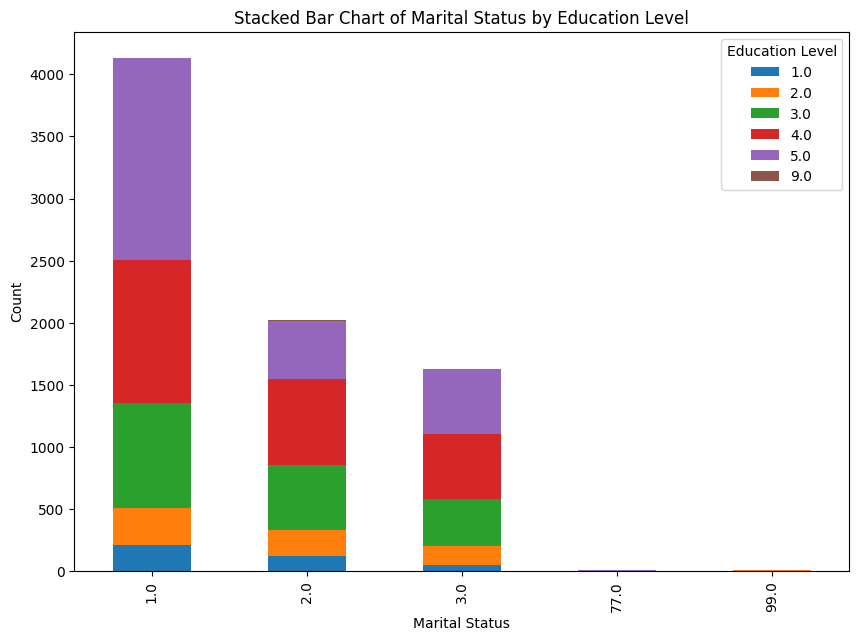

In [42]:
contingency_table.plot(kind='bar', stacked=True, figsize=(10, 7))
plt.title('Stacked Bar Chart of Marital Status by Education Level')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.legend(title='Education Level')
plt.show()

## Summary:

### Data Analysis Key Findings

*   The chi-squared test of independence revealed a statistically significant association between marital status and education level, with a Chi-squared statistic of approximately 199.96 and a p-value of approximately 1.15e-31.
*   The p-value (1.15e-31) is less than the significance level of 0.05, leading to the rejection of the null hypothesis of no association.
*   The stacked bar chart visually represents the distribution of education levels within each marital status category, illustrating the observed association.

### Insights or Next Steps

*   Further analysis could explore the nature of the association by examining standardized residuals from the chi-squared test or calculating measures of association like Cramer's V.
*   Investigating specific combinations of marital status and education level that contribute most to the observed association could provide deeper insights.
